In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = np.array([0.032, 0.9, 0.9, 0.275, 1.1, 
            0.9, 0.214, 0.263, 1.1, 0.45,
            0.034, 2.0, 1.0, 0.275,1.4, 
            0.5, 2.0, 0.8, 1.7, 0.63,
            2.0, 0.5, 2.0, 0.9])
v = np.array([170, 150, 500, -185, 500,
             650, -130, -70, 450, 200,
             290, 1090, 920, -220, 500,
             290, 500, 300, 960, 200,
             800, 270, 850, -30])

(a)

Text(0.5, 1.0, 'v-r')

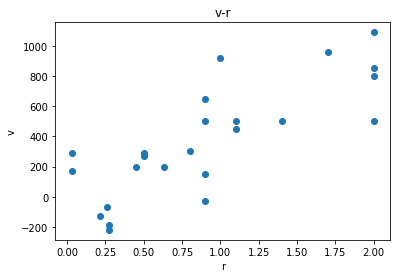

In [4]:
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

Although the points in the diagram are scattered, we can find that most points are distributed around a straight line.

(b)

Here we use 10% of the data as the error.

In [5]:
error = 0.1 * v
error

array([ 17. ,  15. ,  50. , -18.5,  50. ,  65. , -13. ,  -7. ,  45. ,
        20. ,  29. , 109. ,  92. , -22. ,  50. ,  29. ,  50. ,  30. ,
        96. ,  20. ,  80. ,  27. ,  85. ,  -3. ])

(c) and (d)

In [6]:
def lineFit1(x, y):
    xavg = x.mean()
    slope = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    yint = y.mean() - slope*xavg
    return slope, yint

In [7]:
H, a = lineFit1(r, v)
print(H, a)

454.1584409226284 -40.783649095860426


In [8]:
def f(r):
    return H*r - a

454.1584409226284 -40.783649095860426


Text(0.5, 1.0, 'v-r')

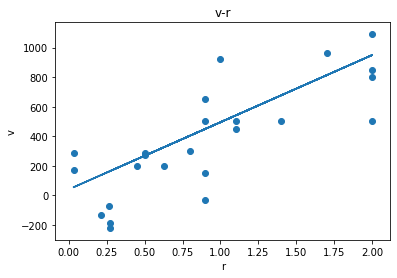

In [10]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.scatter(r, v)
print(H,a)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

(d)

In [11]:
S = 0
for i in range(len(r)):
    S = S + (f(r[i]) - v[i])**2
delta = (S/22)**(0.5)
print(S, delta)

1353119.7454952712 248.00290921087554


454.1584409226284 -40.783649095860426


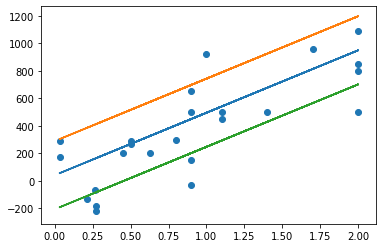

In [12]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.plot(r, v_fit + delta)
plt.plot(r, v_fit - delta)
plt.scatter(r, v)
print(H,a)

We can see about 7(about a third) points miss the error band.

(e)

In [128]:
x_2 = 0
for i in range(len(r)):
    x_2 = x_2 + (f(r[i]) - v[i])**2/error[i]**2
print(x_2)

28428.556282508027


这个值远大于我们的期望值，因为我们采用v的10%作为误差，这导致了v的绝对值越小，它的误差就越小，在计算中越占主导地位。比如点（0.9，-30），相较于其他点，它的误差只有-3，在计算中的作用很大，但实际它的误差远大于-3，而（2.0，1090），尽管它已经十分准确，却因为函数值v太大，其在计算中的作用非常小。